# Informe LEC 4 - Estadística Computacional 2021-1 - Paralelo 01

## Integrantes:
* Renato Burgos - 201973021-5
* Bruno Liberona - 201973013-4
* Bastián Rámila - 201973003-7

## ***¡Se deben importar las siguientes librerías con tal de que las secciones de códigos funcionen!***

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import random
import statsmodels.api as sm
from scipy.special import gamma

## Ítem 1: _Distribución de la media muestral_

El tiempo que una persona demora en leer el libro "Don Quijote de la Mancha" es una variable aleatoria que sigue una distribución normal con promedio 21.72 horas y desviación estándar 2.3 horas.

#### ***a)*** Sea $\overline{X}$ la media de una muestra aleatoria de tamaño $n = 20$ de tiempos de lecturas de este libro. ¿Cuál es en teoría la esperanza de $\overline{X}$ y la desviación estándar de $\overline{X}$?

Al tratarse de una distribución normal, la esperanza de las medias es la misma media de los $n$ datos. Mientras que la desviación estándar se obtiene a partir de la misma desviación estándar de los $n$ datos pero dividida en la raíz cuadrada del número de datos. Una forma de corroborar esto es conociendo la varianza, equivalente a la desviación estándar al cuadrado dividido por el número $n$. Con esto se obtiene la varianza de $\overline{X}$, pero para calcular la desviación estándar se le debe sacar la raíz cuadrada.

### $ E[\overline{X}] = \overline{X} = 21.72$ 

### $ V[\overline{X}] = \frac{\sigma^2}{n} = \frac{5.29}{20} = 0.2645 \Longrightarrow \hat{\sigma} = \sqrt{V[\overline{X}]} = 0.514$

#### ***b)*** Para comprobar los valores de a), obtenga $10^5$ muestras aleatorias de tamaño 20, luego obtenga la media de cada muestra. Calcule la media y la desviación estándar de la muestra de medias que obtuvo. ¿Se esperaba estos valores? Comente.

In [60]:
def lanzamientos(n):
    medias = []
    for i in range(100000):
        muestras = np.random.normal(21.72, 2.3, n)
        medias.append(np.mean(muestras))
    return medias

muestras20 = lanzamientos(20)
print(np.mean(muestras20))
print(np.std(muestras20))

21.71841682582222
0.512933757468983


Antes de entender el ejercicio creíamos que resultaría como desviación estándar las 2.3 horas, pero al calcularla tenía sentido el resultado porque a medida que se tienen más datos en una muestra se tienen medias más cercanas, pero no necesariamente es que el comportamiento de las variables cambie.

#### ***c)*** Repita el proceso de b), pero ahora para un tamaño de muestra aleatoria de $n = 40$ en vez de $n = 20$. Contraste en un solo gráfico la distribución de la muestra de medias obtenido en b) versus la muestra obtenida ahora. Comente lo observado.

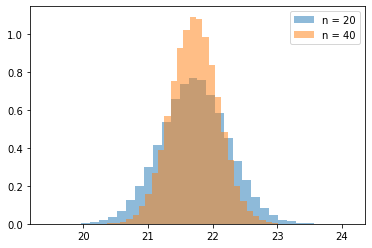

<Figure size 432x288 with 0 Axes>

In [61]:
def graficos():
    muestras40 = lanzamientos(40)
    plt.hist(muestras20, bins = round((max(muestras20) - min(muestras20))/((2*(np.percentile(muestras20, 75) - np.percentile(muestras20,25)))/10)), density = True, alpha=0.5, label='n = 20')
    plt.hist(muestras40, bins = round((max(muestras40) - min(muestras40))/((2*(np.percentile(muestras40, 75) - np.percentile(muestras40,25)))/10)), density = True, alpha=0.5, label='n = 40')
    plt.legend(loc='upper right')
    plt.show()
    plt.clf()
graficos()

La diferencia drástica de los resultados tiene mucho que ver con su desviación estándar, la que resultó mucho mayor en $n = 20$, haciendo que las medias de las muestras resultaran mucho menos distribuidas a lo largo del eje x a medida que se aumenta el valor de $n$.

#### ***d)*** ¿Cuál es la probabilidad de que el tiempo medio de lectura sea mayor a 24 horas cuando $n = 2$?

In [62]:
muestras2 = lanzamientos(2)
print(1 - sp.norm(np.mean(muestras2), np.std(muestras2)).cdf(24))

0.08052046521132583


#### ***e)*** Presente conclusiones.

El número de datos usados en una muestra es trascendental para obtener la media total de las medias muestrales. A diferencia de otros LEC, acá se veía el comportamiento de las medias, y a medida que se tenían más datos la gráfica tomaba una forma más acorde a lo que se buscaba. Acá siempre se nota la distribución normal pero el valor de las variables es muy distinto. Se puede ver que para $n = 40$ el que se obtenga un número mayor a 24 es casi imposible, mientras que para $n = 2$ se tiene cerca de un 8% de probabilidades. Aunque la probabilidad de que alguien se termine ese libro en más de 24 horas es la misma en ambos casos, no se puede decir que se tenga una muestra que promedie ese valor.

## Ítem 2: _Intervalos de confianza_

Se está estudiando la calidad del agua de grifo de cierta localidad. Para esto se tomaron muestras aleatorias del TDS del agua de las casas de esta zona. El TDS es el porcentaje de residuo seco que engloba sales inorgánicas y pequeñas cantidades de materia orgánica disueltas en el agua. Sus principales constituyentes son los cationes de calcio, magnesio, sodio y potasio; y los aniones de carbonato, bicarbonato, cloro, sulfato y nitrato. Este se mide en mg/l. Supongo que la distribución del TDS del agua para esta localidad es una normal con una desviación estándar de 30 mg/l.

#### ***a)*** Calcule un intervalo de confianza de 95% para el TDS promedio si el promedio en una muestra de tamaño 30 fue de 475 mg/l.

Dado que conocemos la desviación estándar poblacional de esta distribución, para estimar el TDS promedio haremos uso del siguiente intervalo de confianza:

## $ [\overline{X} \pm Z_{1-\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}]$ 

En donde $\alpha$ es 0,05, $\overline{X}$ es 475 mg/l y $n$ es 30.

In [63]:
norm = sp.norm()
def confianzaIntervalMeanwStd(alpha, prom,std, n):
    qnorm = norm.ppf(1-alpha/2)
    supcot = prom + qnorm*std/np.sqrt(n)
    infcot = prom - qnorm*std/np.sqrt(n)
    return ("[" + str(round(infcot, 2)) + ", " + str(round(supcot, 2)) + "]")

print(confianzaIntervalMeanwStd(0.05, 475, 30, 30))

[464.26, 485.74]


El intervalo de confianza solicitado resulta ser [464.26, 485.74].

#### ***b)*** Calcule un intervalo de confianza de 90% para el TDS promedio si el promedio en una muestra de tamaño 20 fue de 475 mg/l.

Utilizaremos la misma metodología que en a), pero ahora con nuevos datos:

In [64]:
print(confianzaIntervalMeanwStd(0.1, 450, 30, 20))

[438.97, 461.03]


El intervalo de confianza solicitado resulta ser [438.97, 461.03].

#### ***c)*** ¿De qué tamaño debe ser una muestra si se quiere que el ancho del intervalo de 95% de confianza sea de 1 mg/l?

Para esto, se debe cumplir que la cota superior del intervalo menos la inferior sea 1 mg/l. Debido a que este intervalo sigue siendo el mencionado en a), esta resta queda como:

## $ \overline{X} + Z_{1-\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}} - (\overline{X} - Z_{1-\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}) $
## $ 2(Z_{1-\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}) = 1$ 

Despejando $n$, se tiene:

## $ n =  (2Z_{1-\frac{\alpha}{2}}\sigma)^2$

Lo que representa al tamaño de la muestra necesaria para tener este intervalo. Calculando, se tiene:


In [65]:
qnorm = norm.ppf(1-0.1/2)
n = (2*qnorm*30)**2
print(round(n, 2))

9739.96


Lo que resulta en, aproximadamente, un tamaño para la muestra de 9740, lo cual tiene sentido teniendo en cuenta el acotado intervalo que se está pidiendo.

#### ***d)*** Como experimento, obtenga $10^5$ muestras aleatorias de tamaño 20 a partir de una distribución normal, con la desviación estándar mencionada previamente y una media poblacional $\mu - 500$. Para cada una de estas calcule el intervalo de confianza del 95% para su media muestral. ¿Qué porcentaje de estos intervalos inculye la media real de la población?

In [73]:

count = 0
for i in range(100000):
    muestras = np.random.normal(500, 30, 20)
    promMuestral = sum(muestras)/len(muestras)
    qnorm = norm.ppf(1-0.05/2)
    supcot = promMuestral + qnorm*30/np.sqrt(20)
    infcot = promMuestral - qnorm*30/np.sqrt(20)
    if (supcot > 500 and infcot < 500):
        count += 1

porcentaje = count/1000
print(str(round(porcentaje, 2)) + "%")


94.98%


Aproximadamente (puesto que este porcentaje sigue teniendo una naturaleza aleatoria), el porcentaje del total de los intervalos que cumplen este requisito es de un 95%.

#### ***e)*** ¿Cree que cambiaría este porcentaje si aumenta el tamaño de las muestras? Argumente.

No, puesto que este porcentaje que estamos obteniendo no depende de la cantidad de intervalos con la que estamos trabajando, sino que depende del $\alpha$ que posee nuestro intervalo de confianza. Este valor nos asegura que, de todos los intervalos que obtengas con este grado de confianza (en este caso, 95%), aproximadamente, solo ese porcentaje de intervalos contendrán el valor real del parámetro poblacional.

Ahora suponga que también se está estudiando el consumo de agua de las personas de sta localidad. Se desea calcular la proporción de hogares que consumen agua embotellada en vez de agua de la llave.

#### ***a)*** Luego de encuestar a 20 hogares se calculó que el porcentaje de consumo de agua embotellada es del 65%. Obtenga el intervalo del 95% de confianza para la proporción de la población.

Para calcular el estimador de la proporción de hogares que consumen agua se usa el siguiente intervalo de confianza:

## $ [P_{x} \pm Z_{1-\alpha/2}\sqrt{\frac{P_{x}(1-P_{x})}{n}}] $

Calculando esto con los datos dados ($\alpha=0.05$, $P_{x}=0.65$, $n=20$) se tiene:

In [81]:
qnorm = norm.ppf(1-0.05/2)
print(qnorm)
supcot = 0.65 + qnorm*np.sqrt(0.65*0.35/20)
infcot = 0.65 - qnorm*np.sqrt(0.65*0.35/20)
print("[" + str(round(infcot, 2)) + ", " + str(round(supcot, 2)) + "]")

1.959963984540054
[0.44, 0.86]


El intervalo de confianza obtenido es [0.44, 0.86].

#### ***b)*** ¿Qué método o fórmula utilizó para calcular los límites del IC? ¿Por qué el intervalo de confianza de la proporción no se calcula igual al calculado en a) y b)?

La fórmula con la que se obtuvo este intervalo se mencionó anteriormente, la cual era:

## $ [P_{x} \pm Z_{1-\alpha/2}\sqrt{\frac{P_{x}(1-P_{x})}{n}}] $

Si la analizamos detenidamente, tenemos que la única diferencia entre las dos fórmulas está en el numerador:

## $ [P_{x} \pm Z_{1-\alpha/2}\sqrt{\frac{P_{x}(1-P_{x})}{n}}] \Longleftrightarrow [\overline{X} \pm Z_{1-\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}] $
## $ \sqrt{P_{x}(1-P_{x})} \Longleftrightarrow \sigma $ 

En el lado derecho, $\sigma$ representa la desviación estándar poblacional de la muestra (la cual se rige por una distribución normal). Considerando que esta proporción se rige por una distribución de Bernoulli (cada muestra puede ser 0 o 1), tenemos que el lado izquierdo también representa la desviación estándar de la muestra, puesto que la expresión $P(1-P)$ correspondía a la varianza de esta distribución.

Dicho esto, podemos concluir que ambas expresiones son, en principio, las mismas, solamente cambia la distribución por la que se rige su espacio muestral.

#### ***c)*** Presente conclusiones.

Los intervalos de confianza representan un intervalo de valores en donde el estimador que se esté buscando tenga una cierta probabilidad de aparecer, esto último definido por el grado de confianza con el cual se construya el intervalo. También, la expresión para calcular estos intervalos depende de que parámetro se esté estimando y (en algunos casos) de que manera están distribuidos las muestras con las que se trabaja.

## Ítem 3: _Estimación de parámetros usando máxima verosimilitud_

La estimación de parámetros usando máxima verosimilitud se usa para determinar los parámetros de una distribución de probabilidad basándose en muestras. Suponga que se observan los valores $X_1, X_2, ..., X_n$ de $n$ variables aleatorias iid. El objetivo del método es estimar los parámetros de la distribución $(\theta)$ a partir de los valores observados. La función de verosimilitud $L(\theta) = P(X_1, ..., X_n|\theta)$ nos indica cuál es la probabilidad de que se observen esos valores para cierto parámetro $\theta$. Esta función se define como $L(\theta|X) = 	 \prod_{i=1}^n f(x_i, \theta)$. El método consiste en buscar el parámetro $\theta$ que maximice ésta función.

Usualmente se hace más sencillo trabajar con la función de log-verosimilitud $\ell(\theta)$ = log $L(\theta)$, debido a que el logaritmo es una función que preserva el orden.

Ahora para implementar este método, suponga que la muestra $X_1, X_2, ..., X_n$ proviene de una distribución exponencial con parámetro $\lambda$. Sabemos que la función de densidad de esta distribución viene dada por:

$ f(x; \lambda) = \begin{cases} \lambda e^{- \lambda x} &x \geq 0 \\ \text{0} & \text{de lo contrario} \\ \end{cases}$ 



#### ***a)*** Genere una muestra de tamaño 1000 de esta distribución usando $\lambda = 2$.

#### ***b)*** Escriba una función que calcule la log-verosimilitud, tal que dependa de los datos observados y el parámetro $\lambda$. Grafique $\ell(\lambda)$ en función de $\lambda$, dejando fijo el conjunto de datos los recién obtenidos.

#### ***c)*** Estime el valor de $\lambda$ que maximiza $\ell(\lambda)$. Puede usar algún solver del módulo de scipy "scipy.optimize". Repita el gráfico anterior, pero ahora marque el punto óptimo encontrado.

A continuación repita el proceso anterior, pero ahora para estimar la desviación estándar de una distribución normal.

#### ***d)*** Genere una muestra de tamaño 1000 de una distribución normal usando $\mu = 15$ y  $\sigma = 1,5$.

#### ***e)*** Escriba una función que calcule la log-verosimilitud en base a los datos y $\sigma$.

#### ***f)*** Estime el valor de $\sigma$ que maximiza $\ell(\sigma)$. Grafique $\ell(\sigma)$ marcando el punto óptimo encontrado.